# Simple MNIST MLP Classifier with regularization and Hyperparameter search

**Description:** Simple example for Multi Layer Perceptron MNIST Classifier included several regularization 
examples like dropout, learning rate, early stopping<br>
This example has larger layers and more complex training<br>
**Dataset:** Classical MNIST dataset <br>
.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages

import tensorflow as tf
import matplotlib.pyplot as plt

import keras_tuner as kt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.models import Model


def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

In [20]:
# Data definitions
batch_size = 256
epochs = 15


### Data Preparation

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

### Hyperparameter Search

In [5]:
# MLP definition & Hyperparameter size

def build_model(hp):
    
   ### Optimization of layer sizes
   hlayer1 = hp.Choice('layer1', [8,16,32,128,256,512]) 
   hlayer2 = hp.Int('layer2', min_value=32, max_value=512, step=32)
   hlayer3 = hp.Choice('layer3', [8,16,32,128,256,512]) 

   # iput layer
   inputs = layers.Input(shape=(784,))
   # first hidden layer
   x = layers.Dense(hlayer1, activation='relu')(inputs)
   x = layers.Dropout(0.1)(x)
   # second hidden layer
   x = layers.Dense(hlayer2, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   # third hidden layer
   x = layers.Dense(hlayer3, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   #Final Layer (Output)
   output = layers.Dense(10, activation='softmax')(x)
    
   model = Model(inputs=[inputs], outputs=output)
   model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])   
    
   return model

In [6]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=500,
    overwrite = True)

In [7]:
tuner.search(x_train, y_train, epochs=15, validation_data=(x_test, y_test))
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 222 Complete [00h 01m 17s]
val_accuracy: 0.9797000288963318

Best val_accuracy So Far: 0.9822999835014343
Total elapsed time: 04h 02m 53s
INFO:tensorflow:Oracle triggered exit


### Test the best result 

In [8]:
print('best model has layer1:', best_model.get('layer1'), 'layer 2:', best_model.get('layer2'), 'layer 3:', 
       best_model.get('layer3'))

best model has layer1: 256 layer 2: 192 layer 3: 512


In [9]:
hlayer1 = best_model.get('layer1')
hlayer2 = best_model.get('layer2')
hlayer3 = best_model.get('layer3')

In [10]:
def get_MLP():
    
    # iput layer
    inputs = layers.Input(shape=(784,))
    # first hidden layer
    x = layers.Dense(hlayer1, activation='relu')(inputs)
    x = layers.Dropout(0.1)(x)
    # second hidden layer
    x = layers.Dense(hlayer2, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    # third hidden layer
    x = layers.Dense(hlayer3, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    #Final Layer (Output)
    output = layers.Dense(10, activation='softmax')(x)
    
    model = Model(inputs=[inputs], outputs=output)
    
    return model

In [16]:
model = get_MLP()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 192)               49344     
                                                                 
 dropout_7 (Dropout)         (None, 192)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               98816     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0   

In [22]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0584 - accuracy: 0.9878 - val_loss: 0.1052 - val_accuracy: 0.9806
Epoch 2/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0467 - accuracy: 0.9902 - val_loss: 0.1086 - val_accuracy: 0.9824
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0370 - accuracy: 0.9914 - val_loss: 0.1051 - val_accuracy: 0.9820
Epoch 4/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0320 - accuracy: 0.9925 - val_loss: 0.1143 - val_accuracy: 0.9829
Epoch 5/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9929 - val_loss: 0.1518 - val_accuracy: 0.9834
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0305 - accuracy: 0.9936 - val_loss: 0.1358 - val_accuracy: 0.9838
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0239 - accuracy: 0.9939 - val_loss: 0.1522 - val_accuracy: 0.9805
Epoch 

Test loss: 0.1616361290216446
Test accuracy: 0.9839000105857849
Train accuracy: 0.9992166757583618


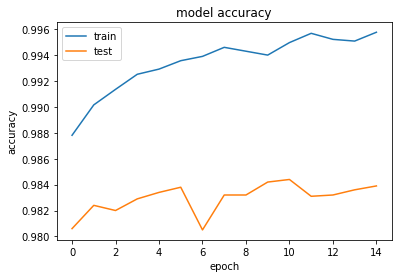

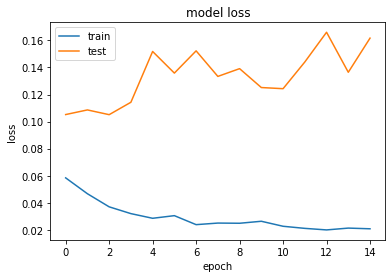

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)